In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import seaborn as sns

%matplotlib inline

data = pd.read_csv('MustangsSeason2019.csv')

pd.set_option("display.max_rows", None)
data=data[['team_name','player_name','player_id','action_name','pos_x','pos_y','pos_dest_x','pos_dest_y','game']]

data = data[~data['pos_x'].isnull()]
data = data[~data['pos_y'].isnull()]
data = data[~data['pos_dest_x'].isnull()]
data = data[~data['pos_dest_y'].isnull()]

data.head()

,team_name,player_name,player_id,action_name,pos_x,pos_y,pos_dest_x,pos_dest_y,game
29,Virginia Cavaliers,Daryl Dike,1067978.0,Non attacking pass accurate,52.8,33.8,38.5,32.4,1
31,Virginia Cavaliers,Joe Bell,489867.0,Non attacking pass accurate,37.5,30.3,29.0,25.2,1
35,Virginia Cavaliers,Andreas Ueland,389881.0,Non attacking pass accurate,35.9,21.6,45.8,12.2,1
36,Virginia Cavaliers,Daniel Steedman,988970.0,Non attacking pass accurate,45.8,12.2,38.8,21.0,1
38,Virginia Cavaliers,Andreas Ueland,389881.0,Non attacking pass accurate,41.5,19.1,36.4,13.8,1


In [19]:
is_Eddie = data['player_id'] == 418384
EM_Virginia = data[is_Eddie]
EM_Virginia.head()

,team_name,player_name,player_id,action_name,pos_x,pos_y,pos_dest_x,pos_dest_y,game
59,SMU Mustangs,Eddie Munjoma,418384.0,Attacking pass accurate,56.3,4.3,72.4,14.5,1
141,SMU Mustangs,Eddie Munjoma,418384.0,Attacking pass inaccurate,44.3,5.3,102.2,8.3,1
181,SMU Mustangs,Eddie Munjoma,418384.0,Attacking pass accurate,13.1,23.2,35.7,17.7,1
189,SMU Mustangs,Eddie Munjoma,418384.0,Attacking pass inaccurate,65.4,6.3,68.9,4.9,1
194,SMU Mustangs,Eddie Munjoma,418384.0,Non attacking pass accurate,73.0,0.0,78.9,4.7,1


C:\Users\WilliamNayden\anaconda3\envs\DS7331\lib\site-packages\seaborn\distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


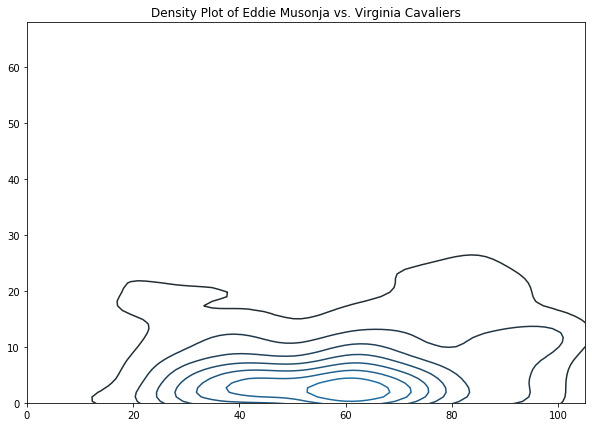

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)


sns.kdeplot(EM_Virginia[['pos_x','pos_y']])
plt.title('Density Plot of Eddie Musonja vs. Virginia Cavaliers')
plt.xlim((0,105))
plt.ylim((0,68))

plt.show()

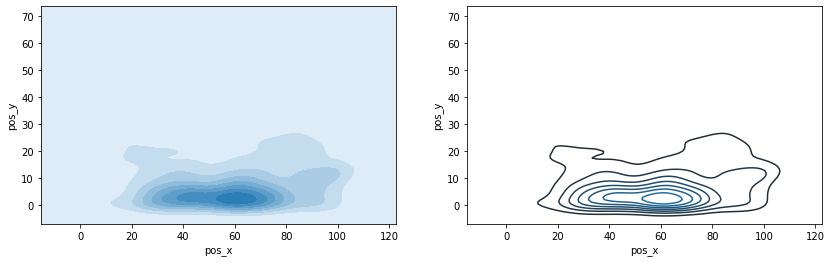

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(14,4)

#Plot one - include shade
plt.subplot(121)
sns.kdeplot(EM_Virginia["pos_x"],EM_Virginia["pos_y"], shade="True")

#Plot two - no shade, lines only
plt.subplot(122)
sns.kdeplot(EM_Virginia["pos_x"],EM_Virginia["pos_y"])

plt.show()

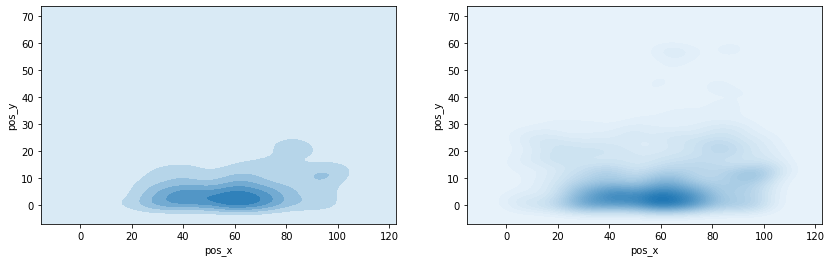

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(14,4)

#Plot One - distinct areas with few lines
plt.subplot(121)
sns.kdeplot(EM_Virginia["pos_x"],EM_Virginia["pos_y"], shade="True", n_levels=5)

#Plot Two - fade lines with more of them
plt.subplot(122)
sns.kdeplot(EM_Virginia["pos_x"],EM_Virginia["pos_y"], shade="True", n_levels=40)

plt.show()

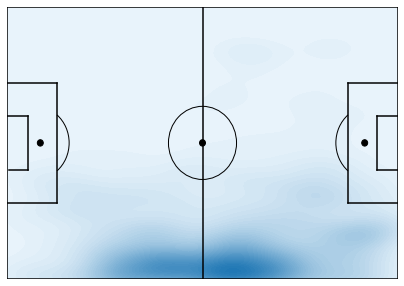

In [45]:
#Create figure
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)

#Pitch Outline & Centre Line
plt.plot([0,0],[0,68], color="black")
plt.plot([0,105],[68,68], color="black")
plt.plot([105,105],[68,0], color="black")
plt.plot([105,0],[0,0], color="black")
plt.plot([52.5,52.5],[0,68], color="black")

#Assign circles to variables - do not fill the centre circle!
centreCircle = plt.Circle((52.5,34),9.15,color="black",fill=False)
centreSpot = plt.Circle((52.5,34),0.8,color="black")
leftPenSpot = plt.Circle((8.9,34),0.8,color="black")
rightPenSpot = plt.Circle((96.1,34),0.8,color="black")

#Draw the circles to our plot
ax.add_patch(centreCircle)
ax.add_patch(centreSpot)
ax.add_patch(leftPenSpot)
ax.add_patch(rightPenSpot)

#Left 6-yard Box
plt.plot([0,5.5],[40.8,40.8],color="black")
plt.plot([5.5,5.5],[40.8,27.2],color="black")
plt.plot([5.5,0.5],[27.2,27.2],color="black")
    
#Right 6-yard Box
plt.plot([105,99.5],[40.8,40.8],color="black")
plt.plot([99.5,99.5],[40.8,27.2],color="black")
plt.plot([99.5,105],[27.2,27.2],color="black")

#Left Penalty Area
plt.plot([13.3,13.3],[49.1,18.9],color="black")
plt.plot([0,13.3],[49.1,49.1],color="black")
plt.plot([13.3,0],[18.9,18.9],color="black")

#Right Penalty Area
plt.plot([105,91.7],[49.1,49.1],color="black")
plt.plot([91.7,91.7],[49.1,18.9],color="black")
plt.plot([91.7,105],[18.9,18.9],color="black")

#Create Arcs
leftArc = Arc((7.5,34),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
rightArc = Arc((97.5,34),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

#Draw Arcs
ax.add_patch(leftArc)
ax.add_patch(rightArc)

#Tidy Axes
plt.axis('off')

sns.kdeplot(EM_Virginia["pos_x"],EM_Virginia["pos_y"], shade=True,n_levels=50)
plt.ylim(0, 68)
plt.xlim(0, 105)


#Display Pitch
plt.show()